In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dataset_path = '/kaggle/input/asl-signs/train_landmark_files'
dataset_files = os.listdir(dataset_path)
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset_files

['36257',
 '25571',
 '55372',
 '26734',
 '16069',
 '53618',
 '27610',
 '32319',
 '49445',
 '28656',
 '4718',
 '2044',
 '37055',
 '22343',
 '34503',
 '29302',
 '37779',
 '62590',
 '18796',
 '30680',
 '61333']

In [3]:
file_paths_dict = {}

In [4]:
for digit in dataset_files:
    # Chemin complet du répertoire du chiffre
    digit_path = os.path.join(dataset_path, digit)
    # Listes des fichiers dans le répertoire du chiffre
    digit_files = os.listdir(digit_path)
    # Chemins complets des sous-fichiers pour le chiffre
    digit_file_paths = [os.path.join(digit_path, file) for file in digit_files]
    # Stocker les chemins complets des sous-fichiers dans le dictionnaire
    file_paths_dict[digit] = digit_file_paths
    # print(file_paths_dict[digit])

In [5]:
# file_paths_dict

In [6]:
print(file_paths_dict['16069'][0])

/kaggle/input/asl-signs/train_landmark_files/16069/2285328250.parquet


In [7]:
metadata_table_test = pq.read_metadata(file_paths_dict['16069'][0])

In [8]:
metadata_table_test

  created_by: parquet-cpp-arrow version 8.0.0
  num_columns: 7
  num_rows: 11946
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 3629

dataset description : 
train_landmark_files/[participant_id]/[sequence_id].parquet The landmark data. The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

frame - The frame number in the raw video.
row_id - A unique identifier for the row.
type - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
landmark_index - The landmark index number. Details of the hand landmark locations can be found here.
[x/y/z] - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

In [9]:
table_test = pq.read_table(file_paths_dict['16069'][0])

In [10]:
# Show example
table_test.to_pandas()

,frame,row_id,type,landmark_index,x,y,z
0,25,25-face-0,face,0,0.508109,0.453158,-0.044283
1,25,25-face-1,face,1,0.515455,0.416532,-0.052965
2,25,25-face-2,face,2,0.510008,0.430839,-0.035313
3,25,25-face-3,face,3,0.500239,0.393610,-0.031450
4,25,25-face-4,face,4,0.515256,0.407667,-0.052959
...,...,...,...,...,...,...,...
11941,46,46-right_hand-16,right_hand,16,NaN,NaN,NaN
11942,46,46-right_hand-17,right_hand,17,NaN,NaN,NaN
11943,46,46-right_hand-18,right_hand,18,NaN,NaN,NaN
11944,46,46-right_hand-19,right_hand,19,NaN,NaN,NaN


Coordonnées relatives

Durée des séquences

Compter nombre de mots dit

Chaque utilisateur à un nombre de frame 

Utilisation de transformeur on traite des séquences (temporelles)

Puiser de l'inspiration dans l'autre Kaggle 

Preprocessing : NaN à virer

250 classes

les distributions des types (face, left hand...)

éventuellement aussi les coordonnées (x,y, z peut être moin pertinent) et les coordonnées peuvent être croisé avec les types

Dans chaque séquence l'utilisateur dit un mot

In [11]:
#file_paths_dict

In [12]:
# Count mean frame
participants = file_paths_dict.keys()
print(participants)
print(len(participants))
nb_values_cumul = 0
for keys,values in file_paths_dict.items() : 
    nb_values = len(values)
    nb_values_cumul += nb_values
    print('number of values for keys', keys, ":", nb_values)
print('mean number of frame : ', nb_values_cumul/len(participants))

dict_keys(['36257', '25571', '55372', '26734', '16069', '53618', '27610', '32319', '49445', '28656', '4718', '2044', '37055', '22343', '34503', '29302', '37779', '62590', '18796', '30680', '61333'])
21
number of values for keys 36257 : 4896
number of values for keys 25571 : 3865
number of values for keys 55372 : 4826
number of values for keys 26734 : 4841
number of values for keys 16069 : 4848
number of values for keys 53618 : 4656
number of values for keys 27610 : 4275
number of values for keys 32319 : 4753
number of values for keys 49445 : 4968
number of values for keys 28656 : 4563
number of values for keys 4718 : 3499
number of values for keys 2044 : 4810
number of values for keys 37055 : 4648
number of values for keys 22343 : 4677
number of values for keys 34503 : 4545
number of values for keys 29302 : 4722
number of values for keys 37779 : 4782
number of values for keys 62590 : 4563
number of values for keys 18796 : 3502
number of values for keys 30680 : 3338
number of values for

In [13]:
# Count duration of a sequence and then mean duration of a sequence assuming we have 24 fps
# table_test = pq.read_table(file_paths_dict['16069'][1]) pour ce cas là pourquoi ça commence à 100 frame ? 


table_test = pq.read_table(file_paths_dict['18796'][45])
table_test = table_test.to_pandas()
table_test['frame'].max()
# Idea : count max frame

27

In [14]:
# max_frame_list = []
# for keys,file_paths in file_paths_dict.items() :
#     for file_path in file_paths:
#         table = pq.read_table(file_path)
#         table = table.to_pandas()
#         max_frame_value = table['frame'].max()
#         max_frame_list.append(max_frame_value)

In [15]:
# output_file = "max_frame_list.txt"

# with open(output_file, 'w') as file:
#     for value in max_frame_list:
#         file.write(str(value) + '\n')

In [16]:
max_frame_list = []
with open('/kaggle/input/max-frame-list/max_frame_list.txt','r') as file : 
    for value in file :
        max_frame_list.append(value)

In [17]:
max_frame_list = [element.strip() for element in max_frame_list]

In [18]:
max_frame_list = [int(element) for element in max_frame_list]

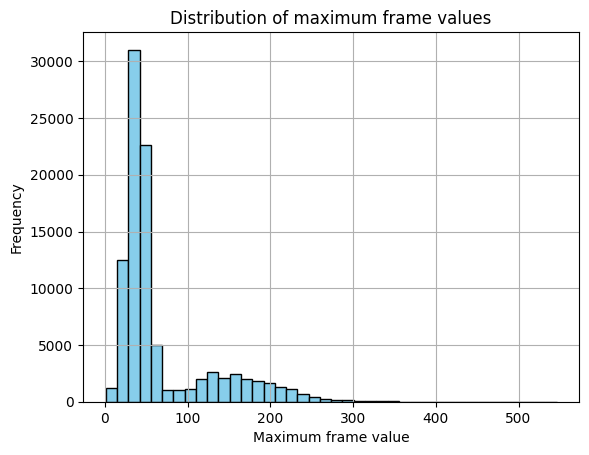

In [19]:
import matplotlib.pyplot as plt
plt.hist(max_frame_list, bins = 40, color = 'skyblue', edgecolor='black')
plt.xlabel('Maximum frame value')
plt.ylabel('Frequency')
plt.title('Distribution of maximum frame values')
plt.grid(True)
plt.show()

In [20]:
mini = 30
maxi = 60
nb_value_min_max = sum(1 for value in max_frame_list if mini <= value <= maxi)
per_plage = (nb_value_min_max / len(max_frame_list)) * 100

In [21]:
per_plage

57.702932988981445

In [22]:
train_df = pd.read_csv('/kaggle/input/asl-signs/train.csv')

In [23]:
train_df

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [24]:
# occurence de chaque signe
occurence_sign = train_df['sign'].value_counts()
print(occurence_sign)

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64


Retrieve image from dataset

In [25]:
table_test['type'].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

Preprocess Data - Fill NAN with 0, normalization

test

In [26]:
table_test = pq.read_table(file_paths_dict['16069'][0])

table_test = table_test.to_pandas()

table_test = table_test.fillna(0)

output_dir = '/kaggle/working/output_dir'


os.makedirs(output_dir, exist_ok=True)

dir_name, base_name = os.path.split(file_paths_dict['16069'][0])

new_file_path = os.path.join(output_dir, f"modified_{base_name}")

table_test.to_parquet(new_file_path, index = False)

Fill NAN Done below

In [27]:
# for keys,file_paths in file_paths_dict.items() :
#     for file_path in file_paths:
#         table = pq.read_table(file_path)
#         df = table.to_pandas()
#         df = df.fillna(0)
#         # Generate a new file name not to erase the original
#         base_name = os.path.basename(file_path)
#         new_file_path = os.path.join(output_dir, f"modified_{base_name}")
#         # Save DataFrame
#         df.to_parquet(new_file_path, index=False)
        
        

Index face

In [28]:
table_test = pq.read_table(file_paths_dict['16069'][0])
df = table_test.to_pandas()
face_df = df[df['row_id'].str.contains('face')]


In [29]:
face_df

,frame,row_id,type,landmark_index,x,y,z
0,25,25-face-0,face,0,0.508109,0.453158,-0.044283
1,25,25-face-1,face,1,0.515455,0.416532,-0.052965
2,25,25-face-2,face,2,0.510008,0.430839,-0.035313
3,25,25-face-3,face,3,0.500239,0.393610,-0.031450
4,25,25-face-4,face,4,0.515256,0.407667,-0.052959
...,...,...,...,...,...,...,...
11866,46,46-face-463,face,463,0.522932,0.395989,0.027273
11867,46,46-face-464,face,464,0.518749,0.396080,0.018803
11868,46,46-face-465,face,465,0.516705,0.395634,0.010260
11869,46,46-face-466,face,466,0.565345,0.395357,0.046344


In [30]:
face_df_first_img = face_df[face_df['frame'] == 25]

In [31]:
face_df_first_img

,frame,row_id,type,landmark_index,x,y,z
0,25,25-face-0,face,0,0.508109,0.453158,-0.044283
1,25,25-face-1,face,1,0.515455,0.416532,-0.052965
2,25,25-face-2,face,2,0.510008,0.430839,-0.035313
3,25,25-face-3,face,3,0.500239,0.393610,-0.031450
4,25,25-face-4,face,4,0.515256,0.407667,-0.052959
...,...,...,...,...,...,...,...
463,25,25-face-463,face,463,0.523712,0.386277,0.033560
464,25,25-face-464,face,464,0.518707,0.386193,0.025007
465,25,25-face-465,face,465,0.515818,0.385254,0.016503
466,25,25-face-466,face,466,0.564032,0.387386,0.052843


In [32]:
index_to_highlight = face_df_first_img.index[face_df_first_img['row_id'] == '25-face-0']

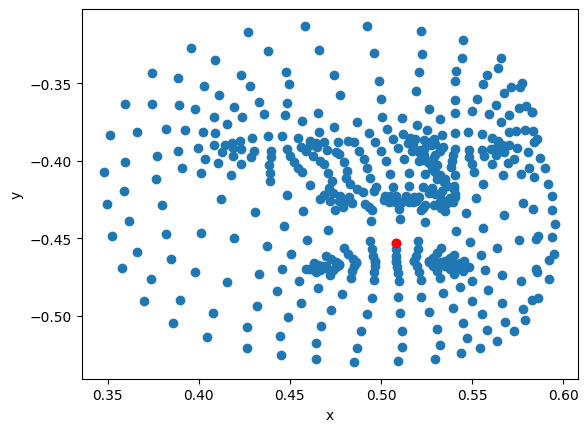

In [33]:
plt.scatter(face_df_first_img['x'],-face_df_first_img['y'])
plt.scatter(face_df_first_img.loc[index_to_highlight, 'x'], -face_df_first_img.loc[index_to_highlight, 'y'], color='red', label='25-face-17')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
# récupération d'une ligne sur 10
every_fifth_row = face_df_first_img.iloc[::2]
index_to_highlight2 = face_df_first_img.index[face_df_first_img['row_id'] == '25-face-0']

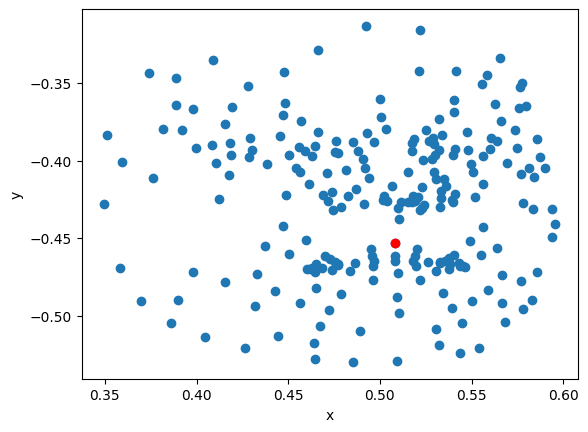

In [35]:
plt.scatter(every_fifth_row['x'],-every_fifth_row['y'])
# for i, row in every_fifth_row.iterrows():
#     plt.text(row['x'], row['y'], str(i), fontsize=5, ha='center', va='bottom')
plt.scatter(face_df_first_img.loc[index_to_highlight, 'x'], -face_df_first_img.loc[index_to_highlight, 'y'], color='red', label='25-face-17')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
face_df_second_img = face_df[face_df['frame'] == 46]
every_fifth_row2 = face_df_second_img.iloc[::2]
index_to_highlight2 = face_df_second_img.index[face_df_first_img['row_id'] == '46-face-0']

In [37]:
face_df_second_img

,frame,row_id,type,landmark_index,x,y,z
11403,46,46-face-0,face,0,0.510864,0.466146,-0.039554
11404,46,46-face-1,face,1,0.514853,0.429575,-0.054493
11405,46,46-face-2,face,2,0.509574,0.442140,-0.033926
11406,46,46-face-3,face,3,0.500544,0.405677,-0.036362
11407,46,46-face-4,face,4,0.514965,0.420858,-0.055692
...,...,...,...,...,...,...,...
11866,46,46-face-463,face,463,0.522932,0.395989,0.027273
11867,46,46-face-464,face,464,0.518749,0.396080,0.018803
11868,46,46-face-465,face,465,0.516705,0.395634,0.010260
11869,46,46-face-466,face,466,0.565345,0.395357,0.046344


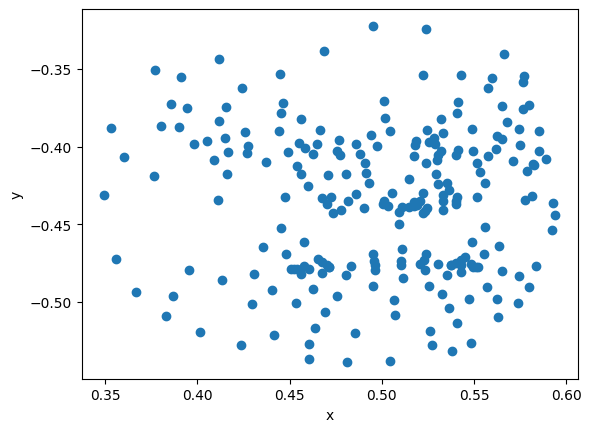

In [38]:
# second frame
plt.scatter(every_fifth_row2['x'],-every_fifth_row2['y'])
plt.scatter(face_df_second_img.loc[index_to_highlight2, 'x'], -face_df_second_img.loc[index_to_highlight2, 'y'], color='red', label='25-face-17')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Work on preprocess dataset**

In [3]:
COMPETITION_PATH = '/kaggle/input/asl-signs/'
dataset_path = '/kaggle/input/asl-signs/train_landmark_files'
user_ids = os.listdir('/kaggle/input/asl-signs/train_landmark_files')

In [7]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [9]:
def select_random_sequence():
    usr = random.choice(user_ids)
    usr_sqc = os.listdir(os.path.join(dataset_path,usr))
    sqc = random.choice(usr_sqc)
    return os.path.join(dataset_path,usr,sqc)

In [10]:
import random
select_random_sequence()

'/kaggle/input/asl-signs/train_landmark_files/2044/3955409377.parquet'

In [11]:
maxX=[]
maxY=[]
maxZ=[]
for usr in user_ids:
    usr_sqc = os.listdir(os.path.join(dataset_path,usr))
    for sqc in usr_sqc:
        pth = os.path.join(dataset_path,usr,sqc)
        df = pd.read_parquet(pth, columns=['x', 'y', 'z'])
        maxX.append(np.max(df.x))
        maxY.append(np.max(df.y))
        maxZ.append(np.max(df.z))

print(f'max x: {np.max(maxX)}\nmax y: {np.max(maxY)}\nmax z: {np.max(maxZ)}')

'''
outputs:

max x: 2.9205052852630615
max y: 3.572496175765991
max z: 4.796591758728027
'''

KeyboardInterrupt: 

In [ ]:
cols = ['frame', 'row_id', 'type', 'landmark_index', 'x', 'y', 'z']
pq_path = select_random_sequence()
df = pd.read_parquet(pq_path, columns=cols)
print(pq_path)
print(f'xmax: {np.max(df.x)}\nymax: {np.max(df.y)}\nxmin: {np.min(df.x)}\nymin: {np.min(df.y)}')

In [ ]:
# lips idx
LIPS_IDXS0 = np.array([
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
        78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
        95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
    ])

# left hand, by taking account face from 0 to 468
LEFT_HAND_IDXS0 = np.arange(468,489)
RIGHT_HAND_IDXS0 = np.arange(522,543)
LEFT_POSE_IDXS0 = np.array([502, 504, 506, 508, 510])
RIGHT_POSE_IDXS0 = np.array([503, 505, 507, 509, 511])

REDUCED_LANDMARKS = np.sort(np.concatenate([LIPS_IDXS0, LEFT_HAND_IDXS0, RIGHT_HAND_IDXS0, LEFT_POSE_IDXS0, RIGHT_POSE_IDXS0]))
print(REDUCED_LANDMARKS)

In [ ]:
train_path = '/kaggle/input/asl-signs/train.csv'
train = pd.read_csv(train_path)
train.head()

In [12]:
import json
 
# Opening JSON file
f = open('/kaggle/input/asl-signs/sign_to_prediction_index_map.json')
 
# returns JSON object as 
# a dictionary
WORD2IDX = json.load(f)
# print(len(WORD2IDX), WORD2IDX)

In [13]:
random_word = random.choice(train.sign.unique())
print(f'idx for {random_word} is {WORD2IDX[random_word]}')

NameError: name 'train' is not defined

In [20]:
preprocess_path = '/kaggle/input/preprocess-dataset'
preprocess_files = os.listdir(preprocess_path)

In [21]:
import pickle
with open('/kaggle/input/preprocess-dataset/preprocess_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [22]:
data

[(array([[[0.41846666, 0.1859253 ],
          [0.42175615, 0.19220416],
          [0.42175576, 0.19222304],
          ...,
          [0.26555035, 0.20150132],
          [0.29686084, 0.19526483],
          [0.32654291, 0.19600704]],
  
         [[0.43016517, 0.18518355],
          [0.43198046, 0.19087045],
          [0.4318133 , 0.19114037],
          ...,
          [0.28830925, 0.18928745],
          [0.32396865, 0.18503644],
          [0.35741168, 0.18632381]],
  
         [[0.42900339, 0.18430185],
          [0.43167323, 0.19052826],
          [0.4315767 , 0.19076155],
          ...,
          [0.30858877, 0.18671   ],
          [0.3447127 , 0.18342933],
          [0.37788722, 0.18448508]],
  
         ...,
  
         [[0.42384559, 0.17507938],
          [0.42456171, 0.18371709],
          [0.42476231, 0.18378682],
          ...,
          [0.        , 0.        ],
          [0.        , 0.        ],
          [0.        , 0.        ]],
  
         [[0.4152548 , 0.17553976],
       

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

In [24]:
class ISLR(Dataset) : 
    def __init__(self, dataset,split):
        self.split = split
        self.dataset = dataset
        
        if split == 'train':
            self.islr_dataset = dataset[:int(0.8*len(dataset))]
        elif split == 'test':
            self.islr_dataset = dataset[int(0.8*len(dataset)):]
    
    def __len__(self):
        return len(self.islr_dataset)
    
    def __getitem__(self, index):
        sample = self.islr_dataset[index]
        features = torch.FloatTensor(sample[0])
        target = WORD2IDX[sample[1]]
        
        return features, target

In [25]:
trainset = ISLR(data, split='train')
testset = ISLR(data, split='test')

In [26]:
len(testset)+len(trainset)

94477

In [27]:
len(data)

94477

In [99]:
features, target = trainset.__getitem__(0)

In [100]:
first_image = features[0]

In [101]:
first_image

tensor([[0.4185, 0.1859],
        [0.4218, 0.1922],
        [0.4218, 0.1922],
        [0.4224, 0.1998],
        [0.4088, 0.1849],
        [0.4015, 0.1863],
        [0.3979, 0.1881],
        [0.3969, 0.1912],
        [0.4000, 0.1912],
        [0.4057, 0.1914],
        [0.4094, 0.1916],
        [0.4148, 0.1920],
        [0.4133, 0.1992],
        [0.4148, 0.1920],
        [0.4058, 0.1915],
        [0.4013, 0.1950],
        [0.4032, 0.1913],
        [0.3987, 0.1930],
        [0.4095, 0.1917],
        [0.4062, 0.1975],
        [0.3966, 0.1897],
        [0.4033, 0.1912],
        [0.4306, 0.1850],
        [0.4453, 0.1871],
        [0.4556, 0.1891],
        [0.4694, 0.1920],
        [0.4656, 0.1920],
        [0.4519, 0.1920],
        [0.4425, 0.1920],
        [0.4322, 0.1921],
        [0.4345, 0.1995],
        [0.4321, 0.1921],
        [0.4517, 0.1920],
        [0.4566, 0.1956],
        [0.4589, 0.1920],
        [0.4641, 0.1937],
        [0.4424, 0.1920],
        [0.4463, 0.1979],
        [0.4

**Augmentation des données**
    
    Augmentation spatiale
    
* Ajout de bruit gaussien (ok)
* Translation (ok)
* Resized crop (not sure given that we already normalized all data)
* Masquage : random erasing (ok)
* Mixup : Combine 2 images and their associated labels with a given ratio, can be done for example with a random body part (almost ok)

    Augmentation temporelle
* Time Shift : shift temporal sequence (ok)

Mettre dans une classe (almost ok)

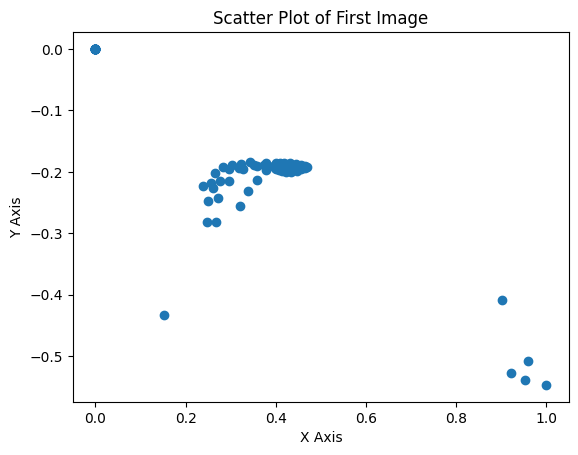

In [33]:
x_coords = first_image[:,0]
# print(x_coords1)
y_coords = first_image[:,1]
plt.scatter(x_coords, -y_coords)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of First Image')
plt.show()

**Add Gaussian Noise**

In [34]:
def add_gaussian_noise(features, noise_std=0.01):
    noise = torch.randn_like(features) * noise_std
    noisy_features = features + noise
    return noisy_features

In [35]:
noised_features = add_gaussian_noise(features)

In [36]:
first_image_noised = noised_features[0]

In [37]:
first_image_noised

tensor([[ 4.2748e-01,  1.7885e-01],
        [ 4.2104e-01,  2.0138e-01],
        [ 4.2213e-01,  1.8366e-01],
        [ 4.1280e-01,  1.8454e-01],
        [ 3.9151e-01,  1.8467e-01],
        [ 3.8822e-01,  1.7866e-01],
        [ 3.9793e-01,  1.8838e-01],
        [ 3.8596e-01,  1.9787e-01],
        [ 3.8782e-01,  2.0586e-01],
        [ 4.0212e-01,  2.0003e-01],
        [ 4.2136e-01,  1.8560e-01],
        [ 4.2943e-01,  1.8298e-01],
        [ 3.9879e-01,  1.8818e-01],
        [ 4.1547e-01,  2.0071e-01],
        [ 4.3211e-01,  1.9344e-01],
        [ 4.1151e-01,  1.8653e-01],
        [ 3.9531e-01,  2.1053e-01],
        [ 3.9129e-01,  1.9236e-01],
        [ 4.1398e-01,  1.9334e-01],
        [ 4.0378e-01,  2.0760e-01],
        [ 3.9414e-01,  1.8439e-01],
        [ 4.0692e-01,  1.8754e-01],
        [ 4.3762e-01,  1.8809e-01],
        [ 4.4732e-01,  1.8669e-01],
        [ 4.3822e-01,  1.7781e-01],
        [ 4.5703e-01,  1.9240e-01],
        [ 4.6590e-01,  1.8460e-01],
        [ 4.5380e-01,  1.918

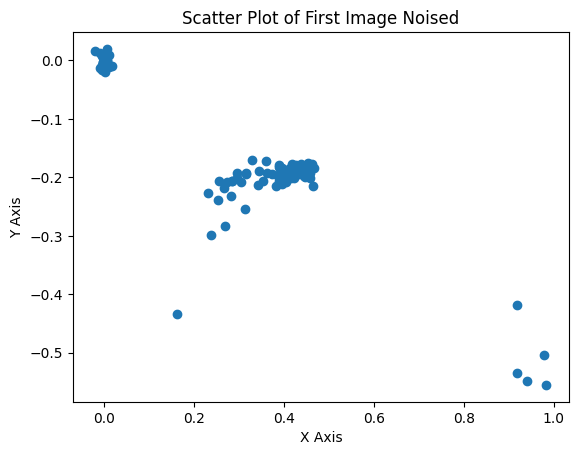

In [38]:
x_coords = first_image_noised[:,0]
# print(x_coords1)
y_coords = first_image_noised[:,1]
plt.scatter(x_coords, -y_coords)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of First Image Noised')
plt.show()

**Add Translation**

In [39]:
def translation(features):
    tr_x = random.uniform(-0.1,0.1)
    tr_y = random.uniform(-0.1,0.1)
    features[:,0] += tr_x
    features[:,1] += tr_y
    return features


In [40]:
first_image_translated = translation(first_image)

In [42]:
first_image_translated

tensor([[ 0.4940,  0.1496],
        [ 0.4973,  0.1559],
        [ 0.4973,  0.1559],
        [ 0.4979,  0.1635],
        [ 0.4843,  0.1486],
        [ 0.4770,  0.1500],
        [ 0.4734,  0.1518],
        [ 0.4724,  0.1549],
        [ 0.4755,  0.1548],
        [ 0.4812,  0.1550],
        [ 0.4849,  0.1553],
        [ 0.4903,  0.1557],
        [ 0.4888,  0.1629],
        [ 0.4903,  0.1557],
        [ 0.4813,  0.1552],
        [ 0.4768,  0.1587],
        [ 0.4787,  0.1550],
        [ 0.4742,  0.1567],
        [ 0.4850,  0.1554],
        [ 0.4817,  0.1612],
        [ 0.4721,  0.1534],
        [ 0.4788,  0.1549],
        [ 0.5061,  0.1487],
        [ 0.5208,  0.1508],
        [ 0.5311,  0.1528],
        [ 0.5449,  0.1557],
        [ 0.5411,  0.1557],
        [ 0.5274,  0.1557],
        [ 0.5180,  0.1557],
        [ 0.5077,  0.1558],
        [ 0.5100,  0.1632],
        [ 0.5076,  0.1558],
        [ 0.5272,  0.1557],
        [ 0.5321,  0.1593],
        [ 0.5344,  0.1557],
        [ 0.5396,  0

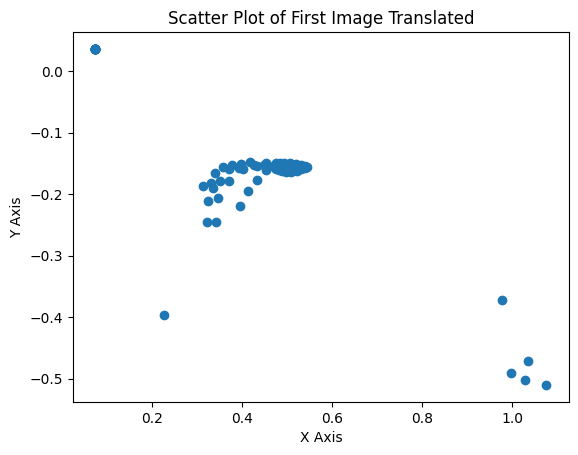

In [43]:
x_coords = first_image_translated[:,0]
# print(x_coords1)
y_coords = first_image_translated[:,1]
plt.scatter(x_coords, -y_coords)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of First Image Translated')
plt.show()

remark : we may need to drop all values above or under certain values to keep the same frame

**Random Erasing**

In [95]:
def random_erasing(points, probability = 0.9, erasing_value = (0,0)):
    if random.uniform(0,1)>probability:
        return points
    points_copy = points.clone()
    nb_points = len(points_copy)
    nb_points_erased = int(nb_points*random.uniform(0.9,0.9))
    erased_indices = random.sample(range(nb_points), nb_points_erased)
    for idx in erased_indices:
        points_copy[idx] = torch.tensor(erasing_value, dtype=points_copy.dtype)
    return points_copy

In [111]:
first_image_masked = random_erasing(first_image)

In [103]:
first_image_masked

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.4000, 0.1912],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.3987, 0.1930],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.4694, 0.1920],
        [0.4656, 0.1920],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.4424, 0.1920],
        [0.0000, 0.0000],
        [0.0

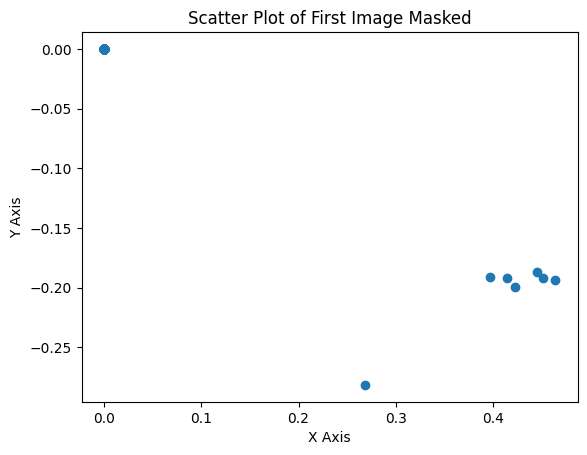

In [112]:
x_coords = first_image_masked[:,0]
# print(x_coords1)
y_coords = first_image_masked[:,1]
plt.scatter(x_coords, -y_coords)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot of First Image Masked')
plt.show()

**Time Shift : shift temporal sequence**

In [176]:
def time_shift_images(sequence, max_shift=5):

    shift = random.randint(-max_shift, max_shift)
    seq_len, num_points, num_features = sequence.shape
    
    shifted_sequence = torch.zeros_like(sequence)  
    
    for i in range(seq_len):
        if i + shift < seq_len:
            shifted_sequence[i + shift] = sequence[i]
    
    return shifted_sequence

In [146]:
features, target

(tensor([[[0.4185, 0.1859],
          [0.4218, 0.1922],
          [0.4218, 0.1922],
          ...,
          [0.2656, 0.2015],
          [0.2969, 0.1953],
          [0.3265, 0.1960]],
 
         [[0.4302, 0.1852],
          [0.4320, 0.1909],
          [0.4318, 0.1911],
          ...,
          [0.2883, 0.1893],
          [0.3240, 0.1850],
          [0.3574, 0.1863]],
 
         [[0.4290, 0.1843],
          [0.4317, 0.1905],
          [0.4316, 0.1908],
          ...,
          [0.3086, 0.1867],
          [0.3447, 0.1834],
          [0.3779, 0.1845]],
 
         ...,
 
         [[0.4238, 0.1751],
          [0.4246, 0.1837],
          [0.4248, 0.1838],
          ...,
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000]],
 
         [[0.4153, 0.1755],
          [0.4158, 0.1837],
          [0.4159, 0.1837],
          ...,
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000]],
 
         [[0.4285, 0.1747],
          [0.4290, 0.1831]

In [172]:
features[-2]

tensor([[0.4153, 0.1755],
        [0.4158, 0.1837],
        [0.4159, 0.1837],
        [0.4157, 0.1938],
        [0.4066, 0.1745],
        [0.3988, 0.1771],
        [0.3944, 0.1802],
        [0.3915, 0.1853],
        [0.3946, 0.1849],
        [0.4007, 0.1838],
        [0.4045, 0.1834],
        [0.4095, 0.1834],
        [0.4069, 0.1931],
        [0.4097, 0.1835],
        [0.4009, 0.1840],
        [0.3954, 0.1888],
        [0.3979, 0.1844],
        [0.3930, 0.1869],
        [0.4046, 0.1835],
        [0.3999, 0.1913],
        [0.3922, 0.1828],
        [0.3980, 0.1843],
        [0.4248, 0.1746],
        [0.4345, 0.1777],
        [0.4403, 0.1809],
        [0.4457, 0.1861],
        [0.4426, 0.1857],
        [0.4346, 0.1843],
        [0.4293, 0.1838],
        [0.4230, 0.1836],
        [0.4253, 0.1934],
        [0.4232, 0.1837],
        [0.4347, 0.1845],
        [0.4398, 0.1894],
        [0.4386, 0.1851],
        [0.4433, 0.1876],
        [0.4295, 0.1839],
        [0.4337, 0.1918],
        [0.4

In [178]:
features_shifted = time_shift_images(features)

In [179]:
features_shifted

tensor([[[0.4302, 0.1852],
         [0.4320, 0.1909],
         [0.4318, 0.1911],
         ...,
         [0.2883, 0.1893],
         [0.3240, 0.1850],
         [0.3574, 0.1863]],

        [[0.4290, 0.1843],
         [0.4317, 0.1905],
         [0.4316, 0.1908],
         ...,
         [0.3086, 0.1867],
         [0.3447, 0.1834],
         [0.3779, 0.1845]],

        [[0.4318, 0.1842],
         [0.4338, 0.1905],
         [0.4333, 0.1910],
         ...,
         [0.3121, 0.1919],
         [0.3440, 0.1860],
         [0.3737, 0.1850]],

        ...,

        [[0.4153, 0.1755],
         [0.4158, 0.1837],
         [0.4159, 0.1837],
         ...,
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000]],

        [[0.4285, 0.1747],
         [0.4290, 0.1831],
         [0.4291, 0.1832],
         ...,
         [0.0291, 0.3096],
         [0.0129, 0.2997],
         [0.0000, 0.2920]],

        [[0.4185, 0.1859],
         [0.4218, 0.1922],
         [0.4218, 0.1922],
         ...,
 

In [173]:
features_shifted[-1]

tensor([[0.4153, 0.1755],
        [0.4158, 0.1837],
        [0.4159, 0.1837],
        [0.4157, 0.1938],
        [0.4066, 0.1745],
        [0.3988, 0.1771],
        [0.3944, 0.1802],
        [0.3915, 0.1853],
        [0.3946, 0.1849],
        [0.4007, 0.1838],
        [0.4045, 0.1834],
        [0.4095, 0.1834],
        [0.4069, 0.1931],
        [0.4097, 0.1835],
        [0.4009, 0.1840],
        [0.3954, 0.1888],
        [0.3979, 0.1844],
        [0.3930, 0.1869],
        [0.4046, 0.1835],
        [0.3999, 0.1913],
        [0.3922, 0.1828],
        [0.3980, 0.1843],
        [0.4248, 0.1746],
        [0.4345, 0.1777],
        [0.4403, 0.1809],
        [0.4457, 0.1861],
        [0.4426, 0.1857],
        [0.4346, 0.1843],
        [0.4293, 0.1838],
        [0.4230, 0.1836],
        [0.4253, 0.1934],
        [0.4232, 0.1837],
        [0.4347, 0.1845],
        [0.4398, 0.1894],
        [0.4386, 0.1851],
        [0.4433, 0.1876],
        [0.4295, 0.1839],
        [0.4337, 0.1918],
        [0.4

In [153]:
features_shifted[-1]

tensor([[0.4153, 0.1755],
        [0.4158, 0.1837],
        [0.4159, 0.1837],
        [0.4157, 0.1938],
        [0.4066, 0.1745],
        [0.3988, 0.1771],
        [0.3944, 0.1802],
        [0.3915, 0.1853],
        [0.3946, 0.1849],
        [0.4007, 0.1838],
        [0.4045, 0.1834],
        [0.4095, 0.1834],
        [0.4069, 0.1931],
        [0.4097, 0.1835],
        [0.4009, 0.1840],
        [0.3954, 0.1888],
        [0.3979, 0.1844],
        [0.3930, 0.1869],
        [0.4046, 0.1835],
        [0.3999, 0.1913],
        [0.3922, 0.1828],
        [0.3980, 0.1843],
        [0.4248, 0.1746],
        [0.4345, 0.1777],
        [0.4403, 0.1809],
        [0.4457, 0.1861],
        [0.4426, 0.1857],
        [0.4346, 0.1843],
        [0.4293, 0.1838],
        [0.4230, 0.1836],
        [0.4253, 0.1934],
        [0.4232, 0.1837],
        [0.4347, 0.1845],
        [0.4398, 0.1894],
        [0.4386, 0.1851],
        [0.4433, 0.1876],
        [0.4295, 0.1839],
        [0.4337, 0.1918],
        [0.4

In [170]:
features_shifted[1]

tensor([[0.4185, 0.1859],
        [0.4218, 0.1922],
        [0.4218, 0.1922],
        [0.4224, 0.1998],
        [0.4088, 0.1849],
        [0.4015, 0.1863],
        [0.3979, 0.1881],
        [0.3969, 0.1912],
        [0.4000, 0.1912],
        [0.4057, 0.1914],
        [0.4094, 0.1916],
        [0.4148, 0.1920],
        [0.4133, 0.1992],
        [0.4148, 0.1920],
        [0.4058, 0.1915],
        [0.4013, 0.1950],
        [0.4032, 0.1913],
        [0.3987, 0.1930],
        [0.4095, 0.1917],
        [0.4062, 0.1975],
        [0.3966, 0.1897],
        [0.4033, 0.1912],
        [0.4306, 0.1850],
        [0.4453, 0.1871],
        [0.4556, 0.1891],
        [0.4694, 0.1920],
        [0.4656, 0.1920],
        [0.4519, 0.1920],
        [0.4425, 0.1920],
        [0.4322, 0.1921],
        [0.4345, 0.1995],
        [0.4321, 0.1921],
        [0.4517, 0.1920],
        [0.4566, 0.1956],
        [0.4589, 0.1920],
        [0.4641, 0.1937],
        [0.4424, 0.1920],
        [0.4463, 0.1979],
        [0.4

In [180]:
def mixup(image1, label1, image2, label2, alpha=0.2):

    
    # Sample lambda from the beta distribution
    lam = np.random.beta(alpha, alpha)
    
    # Create the mixed image
    mixed_image = lam * image1 + (1 - lam) * image2
    
    # Create the mixed label
    mixed_label = lam * label1 + (1 - lam) * label2
    
    return mixed_image, mixed_label

In [181]:
class AugmentationPipeline:
    def __init__(self, augmentations):
        self.augmentations = augmentations

    def __call__(self, image, label=None):
        for aug in self.augmentations:
            if label is not None:
                image, label = aug(image, label)
            else:
                image = aug(image)
        if label is not None:
            return image, label
        return image

# Exemple d'utilisation des fonctions
def apply_augmentations_to_dataset(images, labels):
    # Définir les augmentations
    augmentations = [
        lambda img, lbl: (random_erasing(img), lbl),
        lambda img, lbl: (time_shift(img), lbl),
        lambda img, lbl: mixup_images(img, random.choice(images), lbl, random.choice(labels))
    ]

    pipeline = AugmentationPipeline(augmentations)
    augmented_images = []
    augmented_labels = []

    for img, lbl in zip(images, labels):
        aug_img, aug_lbl = pipeline(img, lbl)
        augmented_images.append(aug_img)
        augmented_labels.append(aug_lbl)

    return torch.stack(augmented_images), torch.stack(augmented_labels)